In [23]:
#### PCA PSD
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import pywt
import struct
import matplotlib.gridspec as gridspec

In [2]:
def PreAmp(Tao,deltaT,Time,Trigger,Amp,NoiseAmp):
    N_sample=int(Time/deltaT)
    Vout=np.arange(N_sample,dtype=float)
    Noise=NoiseAmp*np.random.randn(N_sample)
    for i in np.arange(N_sample):
        t=i*deltaT
        if(t<Trigger):
            Vout[i]=0
        else:
            Vout[i]=Amp*math.exp(-(t-Trigger)/Tao)
    return Vout+Noise

def Event_Creator(Length,Amplitude,NoiseAmp=1):
    return PreAmp(100,0.01,Length*0.01,0.4*Length*0.01,Amplitude,NoiseAmp)

def MoveA(Npoint,Data):
    Out=np.zeros(len(Data),)
    front_ave=0
    for i in range(Npoint):
        front_ave+=Data[i]/float(Npoint)
    Out[0:Npoint]=front_ave
    sum=front_ave*Npoint
    for i in range(Npoint,len(Data)):
        sum=sum+Data[i]-Data[i-Npoint]
        Out[i]=sum/float(Npoint)
    return Out    
def NMoveA(Npoint,Ntimes,Data):
    for i in range(Ntimes):
        Data=MoveA(Npoint,Data)
    return Data   

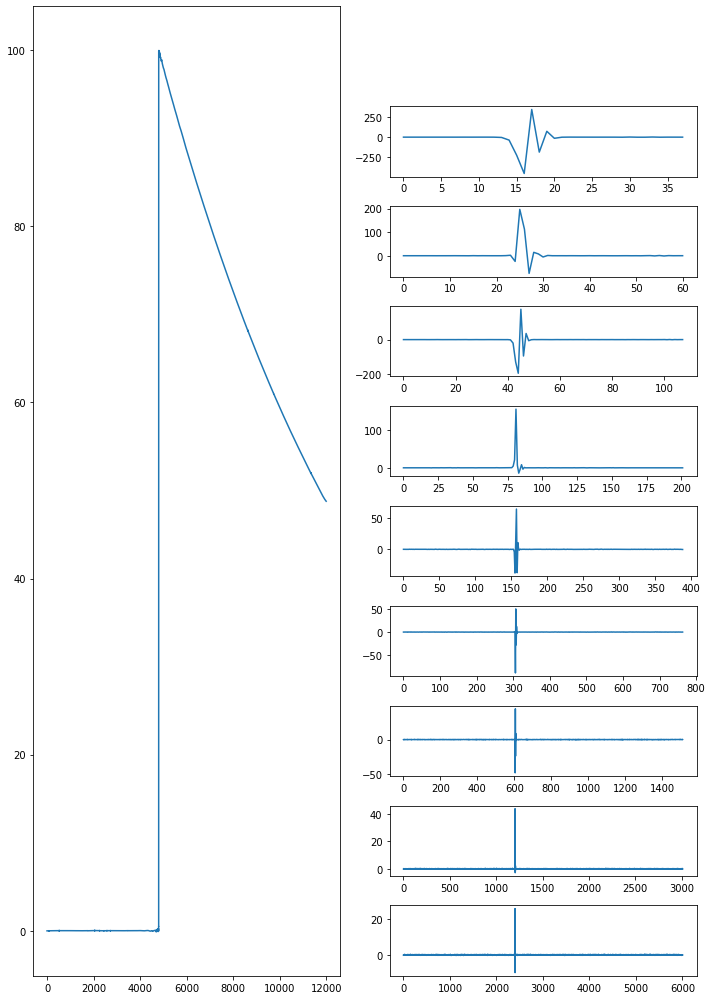

In [49]:
Vin=Event_Creator(12000,100,0.1)
threshold=0.005
fig = plt.figure(tight_layout=True,figsize=(10,14))


wave='db8'
w=pywt.Wavelet(wave)
maxlev=pywt.dwt_max_level(len(Vin),w.dec_len)
#decompose into wavelet components to the level selected 
coeffs=pywt.wavedec(Vin,wave,level=maxlev) #将信号进行小波分解
gs = gridspec.GridSpec(len(coeffs), 2)
for i in range(1,len(coeffs)):
    ax=fig.add_subplot(gs[i,1])
    ax.plot(coeffs[i])

for i in range(2,len(coeffs)):
    coeffs[i]=pywt.threshold(coeffs[i],0.3) #将噪声滤波
#threshold*max(coeffs[i])
datarec=pywt.waverec(coeffs,wave)

#Vin=Event_Creator(1200,1)
ax=fig.add_subplot(gs[:,0])
ax.plot(datarec)
plt.show()
